✅ Dataset loaded. Shape: (14, 7)
             district  fatalities  no_of_camps  actual_rainfall_in_mm  \
0  Thiruvananthapuram          11           94                  373.8   
1              Kollam           5          168                  644.1   
2      Pathanamthitta           3         4352                  764.9   
3           Alappuzha          43         2126                  608.2   
4            Kottayam          14          788                  619.2   

   normal_rainfall_in_mm  no_of_landslides  full_damaged_houses  
0                  142.0                 0                  111  
1                  258.7                 2                   95  
2                  352.7                 8                  741  
3                  343.1                 0                 2075  
4                  386.0                29                   76  

📌 Added Wayanad 2024 case
      district  fatalities  no_of_camps  actual_rainfall_in_mm  \
10   Kozhikode          16          399

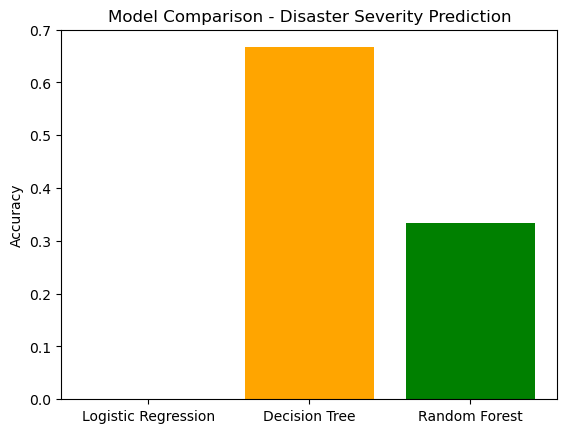


🎯 Predicted severity for Wayanad 2024 case: High


In [2]:
# -----------------------------
# Week 3 - Modeling & Prediction
# Dataset: district_wise_details.csv
# Focus: Kerala disasters + Wayanad 2024 landslide
# -----------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 2. Load Dataset
# -----------------------------
file_name = "district_wise_details.csv"
df = pd.read_csv(file_name)

print("✅ Dataset loaded. Shape:", df.shape)
print(df.head())

# -----------------------------
# 3. Add Wayanad 2024 Landslide Case
# -----------------------------
# Match the dataset columns exactly
new_row = {
    "district": "Wayanad",
    "fatalities": 250,                  # 🔴 replace with actual data if available
    "no_of_camps": 45,                   # example placeholder
    "actual_rainfall_in_mm": 1053.5,     # example placeholder
    "normal_rainfall_in_mm": 592.9,      # example placeholder
    "no_of_landslides": 47,              # example placeholder
    "full_damaged_houses": 1000          # example placeholder
}

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

print("\n📌 Added Wayanad 2024 case")
print(df.tail())

# -----------------------------
# 4. Create Severity Target
# -----------------------------
# Binning based on fatalities
df['Severity'] = pd.cut(
    df['fatalities'],
    bins=[-1, 10, 50, np.inf],
    labels=['Low', 'Medium', 'High']
)

print("\nSeverity distribution:")
print(df['Severity'].value_counts())

# -----------------------------
# 5. Preprocessing
# -----------------------------
# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Split features/target
X = df.drop(columns=['Severity'])
y = df['Severity']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Drop any rows with NaN (safety)
df = df.dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# -----------------------------
# 6. Modeling
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    results[name] = acc
    
    print("\n📌", name)
    print("Accuracy:", round(acc, 3))
    print(report)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 7. Compare Models
# -----------------------------
plt.bar(results.keys(), results.values(), color=['blue','orange','green'])
plt.ylabel("Accuracy")
plt.title("Model Comparison - Disaster Severity Prediction")
plt.show()

# -----------------------------
# 8. Highlight Wayanad 2024 Prediction
# -----------------------------
# Extract last added row (Wayanad case)
wayanad_case = df.iloc[-1].drop('Severity').values.reshape(1, -1)

# Train best model (Random Forest)
best_model = RandomForestClassifier(random_state=42, n_estimators=100)
best_model.fit(X_train, y_train)
wayanad_pred = best_model.predict(wayanad_case)

print("\n🎯 Predicted severity for Wayanad 2024 case:", wayanad_pred[0])


In [3]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# ✅ Train the best model again (Random Forest in your case)
best_model = RandomForestClassifier(random_state=42, n_estimators=100)
best_model.fit(X_train, y_train)

# ✅ Save the trained model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# ✅ Save the scaler used for feature scaling
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ best_model.pkl and scaler.pkl saved successfully!")


✅ best_model.pkl and scaler.pkl saved successfully!


In [4]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Fathima Rana\INTERNSHIP\AICTE INTERNSHIP
